### Exercise 4: Bringing it all together

Author: Laura Gutierrez Funderburk

Created on: April 18 2018

Last modified on: April 20 2018

### Abstract

In this notebook, we will do a recap of what we learned and will implement the tools we created throughout exercises 1 through 3. 

I thank the workshop participants for their interest and I welcome feedback on my performance as a facilitator as well as the notebooks and exercises provided throughout this workshop.


In [1]:
# Run analyze.py and functions.py scripts
%run -i analyze.py
%run -i functions.py

We learned how to read and store file content in a table and to use comprehension lists to ease that process. Refer to functions.py for details on functions. 

In [2]:
# Store directory location into variable
data_directory = "./DATA/"
# Indicate where to find ALL_GENE_file
ALL_GENE_FILE_DIRECTORY = "./DATA/ALL_GENE_file"
# Indicate where to find all files of the form output-*.out
output = "./DATA/OUTPUT_FOR_PLOTTING/"

# access all file names that end with a csv
data_files = glob.glob(data_directory + "*.csv")
# Use glob library to store file names in array
all_the_files = glob.glob(output + "output-*.out")

We also learned how the use of comprehension lists made the process of iteraring over hundreds of entries more efficient. We learned to parse and extract desired information. 

We learned to store desired information via comprehension lists. 

In [3]:
#### COMPREHENSION LISTS 
# Tabulate data.csv
clusters = store_data_in_table(data_directory,"csv")
# Disect tabulated data
disect_clusters = disect_table(clusters)
# Extract first and fourth entry in each row, remove repetitions
clusters_A_B = get_families(disect_clusters)
# Print pairs of entries
print(clusters_A_B)

[['MZ22526841', 'MZ22526881'], ['MZ22523024', 'MZ22514750'], ['MZ22523465', 'MZ22521375'], ['MZ22518487', 'MZ22509506'], ['MZ22514725', 'MZ22502949'], ['MZ22518612', 'MZ22503849'], ['MZ22506809', 'MZ22509191'], ['MZ22515259', 'MZ22523467'], ['MZ22517038', 'MZ22509079'], ['MZ22506348', 'MZ22507135'], ['MZ22523747', 'MZ22513314'], ['MZ22526808', 'MZ22526813'], ['MZ22520218', 'MZ22501769'], ['MZ22515311', 'MZ22506271'], ['MZ22519119', 'MZ22518135'], ['MZ22521610', 'MZ22508066'], ['MZ22516940', 'MZ22516071'], ['MZ22501194', 'MZ22503731'], ['MZ22506632', 'MZ22502318'], ['MZ22510658', 'MZ22509401'], ['MZ22512069', 'MZ22507380'], ['MZ22526117', 'MZ22519193'], ['MZ22522161', 'MZ22502612'], ['MZ22522073', 'MZ22515097'], ['MZ22506124', 'MZ22502935'], ['MZ22520997', 'MZ22515611'], ['MZ22518279', 'MZ22511606'], ['MZ22518279', 'MZ22526701'], ['MZ22508040', 'MZ22503867'], ['MZ22508040', 'MZ22507529'], ['MZ22520185', 'MZ22521381'], ['MZ22524393', 'MZ22513599'], ['MZ22503562', 'MZ22502439'], ['MZ22503

We also learned how the use of dictionaries can come in handy when accessing specific information within a large data file. 

In [4]:
#### DICTIONARIES
# Cluster A
CL_A_entries = [item[0] for item in clusters_A_B]
# Get size of CL_A_entries array
size_A = len(CL_A_entries)
# Define dictionary
CL_A_dictionary = {CL_A_entries[i]:output_entries_in_ALL_GENE_FILE(CL_A_entries[i]) for i in range(size_A)}
print("We access a value in dictionary A using the key 'MZ22526841'" )
print(CL_A_dictionary["MZ22526841"])
print("\n")
# Cluster B
CL_B_entries = [item[1] for item in clusters_A_B]
# Get size of CL_B_entries array
size_B = len(CL_B_entries)
# Define dictionary
CL_B_dictionary = {CL_B_entries[i]:output_entries_in_ALL_GENE_FILE(CL_B_entries[i]) for i in range(size_B)}
print("We access a value in dictionary B using the key 'MZ22526881'" )
print(CL_B_dictionary["MZ22526881"])

We access a value in dictionary A using the key 'MZ22526841'
['Anopheles_culicifacies\tKI423184\tMZ22526841\tACUA019829\t+\t6008\t6658\t2\t6008-6056:6333-6658\n', 'Anopheles_melas\tKI432298\tMZ22526841\tAMEC021565\t-\t3210\t4249\t2\t3210-3499:4129-4249\n', 'Anopheles_merus\tAXCQ01005900\tMZ22526841\tAMEM018040\t+\t87038\t88055\t2\t87038-87152:87766-88055\n']


We access a value in dictionary B using the key 'MZ22526881'
['Anopheles_albimanus\tKB672397\tMZ22526881\tAALB001329\t-\t639406\t641888\t2\t639406-639664:641782-641888\n', 'Anopheles_arabiensis\tKB704518\tMZ22526881\tAARA011841\t+\t1141440\t1141932\t2\t1141440-1141640:1141930-1141932\n', 'Anopheles_atroparvus\tKI421882\tMZ22526881\tAATE002511\t-\t19003766\t19031140\t3\t19003766-19003879:19030658-19030865:19031085-19031140\n', 'Anopheles_christyi\tKB678624\tMZ22526881\tACHR004024\t+\t15893\t16465\t2\t15893-16090:16460-16465\n', 'Anopheles_dirus\tKB673423\tMZ22526881\tADIR005988\t+\t1328936\t1329927\t3\t1328936-1328973:1329513-1329

Last, but certainly not least, we brought all together and parsed a messy output file. We tabulated the data using comprehension lists and used dataframes and lambda functions to clean our data. 

With the help of dataframes, the process of plotting results was simplified. 

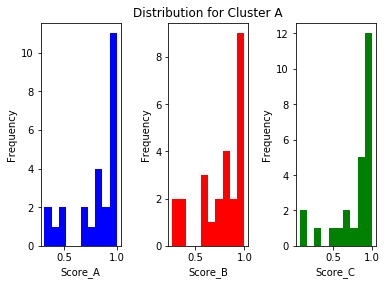

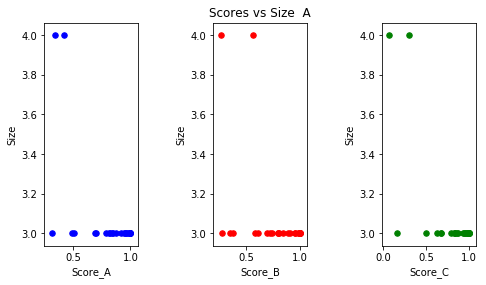

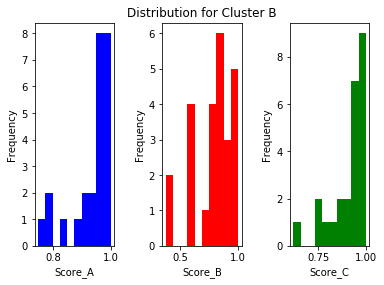

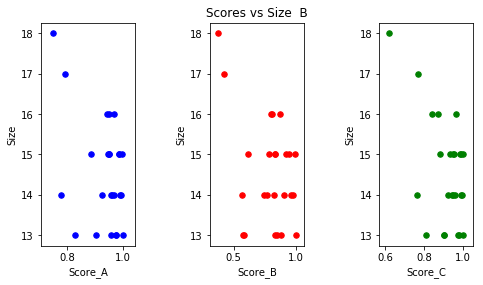

In [5]:
#### DATAFRAMES
# Apply data_to_dataframe on all output files
data_pair = data_to_dataframe(all_the_files)

# Cleaning data files
clean_data_pair = clean_data_frame(data_pair)

# Dataframes for both clusters
ClusterA_Data_Frame = clean_data_pair[0]
ClusterB_Data_Frame = clean_data_pair[1]

# Plotting results
# Cluster A
plot_frequency(ClusterA_Data_Frame,"A")
plot_number_seq_vs_scores(ClusterA_Data_Frame,"A")
# Cluster B
plot_frequency(ClusterB_Data_Frame,"B")
plot_number_seq_vs_scores(ClusterB_Data_Frame,"B")

### Conclusion

In this workshop we worked with a variety of data files: from ordered .csv files and tables, to disorganized raw input from open source software. 

With the help of dictionaries, comprehension lists, dataframes among other Python libraries, we turned a painful process with multiple large files into a smooth and easy to interpret set of results. 